In [1]:
import pandas as pd

In [4]:
df = pd.read_excel("../data/processed/mon_dossier/HR_Data.xlsx")


In [ ]:
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [8]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [17]:
(df['Attrition'].value_counts(normalize=True)*100).round(2).astype(str) +" %"
#df['Attrition'].value_counts(normalize=True)

Attrition
No     83.88 %
Yes    16.12 %
Name: proportion, dtype: object

In [20]:
df['CF_age band'].value_counts()

CF_age band
25 - 34     554
35 - 44     505
45 - 54     245
Under 25     97
Over 55      69
Name: count, dtype: int64

In [ ]:
#df["Job Role"] == "Research Scientist
#df["CF_age band"] == "35 - 44"
# & ----> et logique

df[(df["Job Role"] == "Research Scientist") & (df["CF_age band"] == "35 - 44")]




,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
19,No,Travel_Rarely,35 - 44,Current Employees,R&D,Life Sciences,STAFF-24,24,Male,Research Scientist,...,3,3,80,0,6,3,3,2,1,2
35,No,Travel_Rarely,35 - 44,Current Employees,R&D,Medical,STAFF-46,46,Female,Research Scientist,...,3,4,80,2,6,2,5,3,1,4
38,No,Travel_Rarely,35 - 44,Current Employees,R&D,Life Sciences,STAFF-51,51,Female,Research Scientist,...,3,4,80,1,6,4,1,1,0,0
47,No,Travel_Rarely,35 - 44,Current Employees,R&D,Life Sciences,STAFF-61,61,Male,Research Scientist,...,4,1,80,0,8,3,1,0,0,0
68,No,Travel_Frequently,35 - 44,Current Employees,R&D,Medical,STAFF-88,88,Male,Research Scientist,...,3,4,80,1,5,2,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,No,Travel_Rarely,35 - 44,Current Employees,R&D,Life Sciences,STAFF-1999,1999,Male,Research Scientist,...,4,1,80,1,12,3,5,3,1,0
1392,No,Travel_Rarely,35 - 44,Current Employees,R&D,Other,STAFF-1847,1847,Female,Research Scientist,...,4,4,80,1,15,3,1,0,0,0
1397,No,Travel_Rarely,35 - 44,Current Employees,R&D,Medical,STAFF-1885,1885,Male,Research Scientist,...,4,3,80,1,16,3,5,3,0,4
1443,Yes,Travel_Frequently,35 - 44,Ex-Employees,R&D,Medical,STAFF-1792,1792,Male,Research Scientist,...,3,3,80,3,6,2,5,3,2,3


In [25]:
df_filter = df[(df["Job Role"] == "Research Scientist") & (df["CF_age band"] == "35 - 44")]

In [26]:
df_filter.shape

(85, 39)

In [29]:
(df_filter.groupby("Gender")["Attrition"].value_counts(normalize=True)*100).round(2)

Gender  Attrition
Female  No           96.55
        Yes           3.45
Male    No           87.50
        Yes          12.50
Name: proportion, dtype: float64

9 % de plus taux d'attrition parmis les femmes qui ont fait des etudes en Research Scientist

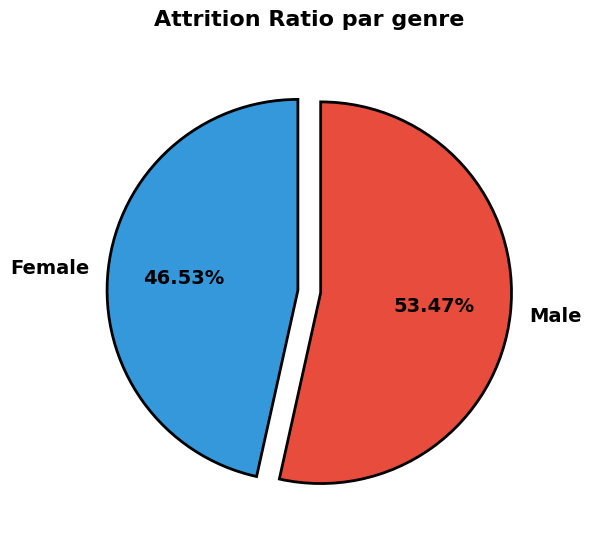


Female attrition: 14.80%
Male attrition: 17.01%
Difference: 2.21%


In [37]:
import matplotlib.pyplot as plt

# Calculer les pourcentages d'attrition par genre
attrition_by_gender = df.groupby("Gender")["Attrition"].apply(
    lambda x: (x == "Yes").sum() / len(x) * 100
).round(2)

# Créer le camembert
plt.figure(figsize=(6, 6))
colors = ['#3498db', '#e74c3c']  # Bleu pour Female, Rouge pour Male
explode = (0.06, 0.06)  # Séparer légèrement les parts

plt.pie(attrition_by_gender, 
        labels=attrition_by_gender.index,
        autopct='%1.2f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        textprops={'fontsize': 14, 'fontweight': 'bold'},
        wedgeprops={'edgecolor': 'black', 'linewidth': 2})

plt.title('Attrition Ratio par genre', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"\nFemale attrition: {attrition_by_gender['Female']:.2f}%")
print(f"Male attrition: {attrition_by_gender['Male']:.2f}%")
print(f"Difference: {abs(attrition_by_gender['Male'] - attrition_by_gender['Female']):.2f}%")